# IIA 2024 - Aprendizaje Automatizado

## Introducción a Jupyter Notebooks y Generación de Datos

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## Diagonales

Generar n datos con d inputs:

  - n/2 pertenecientes a la categoría 0. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (-1, -1, -1, ... , -1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).
  - n/2 pertenecientes a la categoría 1. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (1, 1, 1, ... ,1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).


In [105]:
def covM(d, C):
  return np.identity(d)*([C*np.sqrt(d)]*d)

def diagonales(n, d, C):
  #Clase0
  c0 = [np.append(x, 0) for x in np.random.multivariate_normal([-1]*d, covM(d, C), int(n/2))]
  #Clase1
  c1 = [np.append(x, 1) for x in np.random.multivariate_normal([1]*d, covM(d, C), int(n/2))]

  flist = c0 + c1
  # Crear DataFrame
  df = pd.DataFrame(flist, columns=[f'dim_{i}' for i in range(d)] + ['class'])
  return df

Verificamos ahora los datos generados, mostrándolos con matplotlib.pyplot

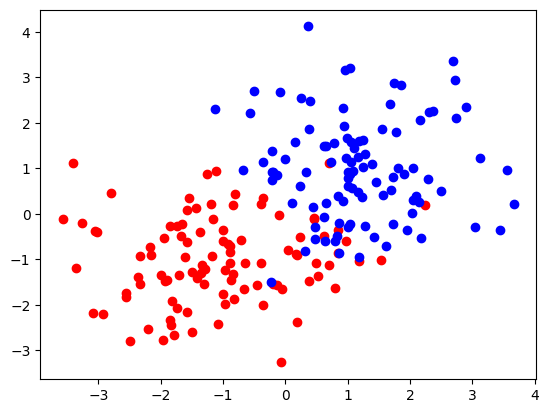

In [106]:
diag_df = diagonales(200, 2, 0.75)

# diferenciar entre clase 0 y clase 1
class0_df = diag_df[diag_df['class'] == 0]
class0_a = class0_df.drop(columns=["class"]).to_numpy()
xs0 = class0_a[:, 0]
ys0 = class0_a[:, 1]

class1_df = diag_df[diag_df['class'] == 1]
class1_a = class1_df.drop(columns=["class"]).to_numpy()
xs1 = class1_a[:, 0]
ys1 = class1_a[:, 1]

plt.scatter(xs0, ys0, color='red')
plt.scatter(xs1, ys1, color='blue')
plt.show()

## Paralelas

Igual al punto anterior, pero las distribuciones tienen centro en el ( 1, 0, 0, .... , 0 ) y en el ( -1, 0, 0, .... , 0 ), respectivamente y la desviación estandar es igual a C independientemente de d.

In [107]:
def covM2(d, C):
  return np.identity(d)*([C]*d)

def paralelas(n, d, C):
  #Clase0
  c0 = [np.append(x, 0) for x in np.random.multivariate_normal([-1] + [0]*(d-1), covM2(d, C), int(n/2))]
  #Clase1
  c1 = [np.append(x, 1) for x in np.random.multivariate_normal([1] + [0]*(d-1), covM2(d, C), int(n/2))]

  flist = c0 + c1
  # Crear DataFrame
  df = pd.DataFrame(flist, columns=[f'dim_{i}' for i in range(d)] + ['class'])
  return df

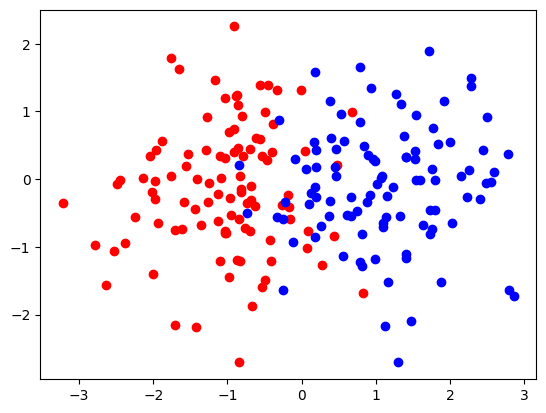

In [108]:
para_df = paralelas(200, 2, 0.75)

# diferenciar entre clase 0 y clase 1
class0_df = para_df[para_df['class'] == 0]
class0_a = class0_df.drop(columns=["class"]).to_numpy()
xs0 = class0_a[:, 0]
ys0 = class0_a[:, 1]

class1_df = para_df[para_df['class'] == 1]
class1_a = class1_df.drop(columns=["class"]).to_numpy()
xs1 = class1_a[:, 0]
ys1 = class1_a[:, 1]

plt.scatter(xs0, ys0, color='red')
plt.scatter(xs1, ys1, color='blue')
plt.show()

## Espirales

Generar n datos. De los n puntos generados, n/2 deben pertenecer a cada clase.

Los datos tienen 2 inputs, x e y, que corresponden a puntos generados al azar con una distribución UNIFORME (en dicho sistema de referencia x-y) dentro de un circulo de radio 1.

El output es binario, correspondiendo la clase 0 a los puntos que se encuentran entre las curvas ro = theta/4pi y ro = (theta + pi)/4pi (en polares) y la clase 1 al resto.

In [109]:
def cartesian_to_polar(x, y):
    rho = (x**2 + y**2)**0.5
    theta = math.atan2(y, x)
    return rho, theta

def is_inside_curve(rho, theta, npi):
  rho_curve1 = (theta + (npi-1)*math.pi) / (4 * math.pi)
  rho_curve2 = (theta + npi*math.pi) / (4 * math.pi)
  return rho_curve1 <= rho <= rho_curve2

def is_inside_curves(x, y):
    rho, theta = cartesian_to_polar(x, y)
    return is_inside_curve(rho, theta, 1) or is_inside_curve(rho, theta, 3) or is_inside_curve(rho, theta, 5)

def espirales(n):
  count0 = 0
  count1 = 0
  l = []
  while (count0 + count1) < n:
    x = np.random.uniform(-1, 1, 1)
    y = np.random.uniform(-1, 1, 1)
    if ((x**2 + y**2)**0.5 < 1): # si esta adentro del circulo
      if (is_inside_curves(x, y)):
        if count0 < int(n/2):
          l.append([x, y, 0])
          count0+=1
      else:
        if count1 < int(n/2):
          l.append([x, y, 1])
          count1+=1
  df = pd.DataFrame(l, columns=['dim_1', 'dim_2', 'class'])
  return df

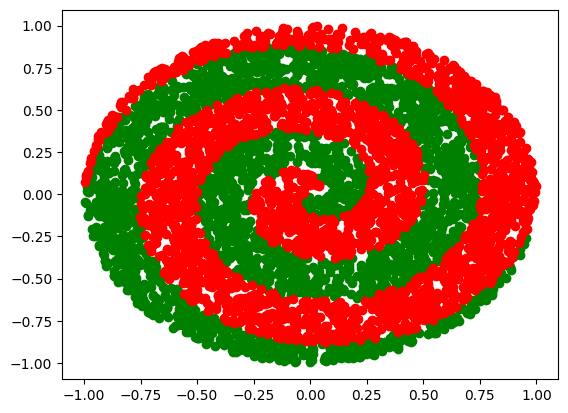

In [110]:
espiral_df = espirales(5000)

# # diferenciar entre clase 0 y clase 1
class0_df = espiral_df[espiral_df['class'] == 0]
class0_a = class0_df.drop(columns=["class"]).to_numpy()
xs0 = class0_a[:, 0]
ys0 = class0_a[:, 1]

class1_df = espiral_df[espiral_df['class'] == 1]
class1_a = class1_df.drop(columns=["class"]).to_numpy()
xs1 = class1_a[:, 0]
ys1 = class1_a[:, 1]

plt.scatter(xs0, ys0, color='green')
plt.scatter(xs1, ys1, color='red')
plt.show()
